## Email spam detection using NLTK & Naive Bayes
#By- Shubham Kumar
#Dated: October 23,2021

In [2]:
!pip install nltk
!pip install autocorrect
!pip install scikit-learn

In [3]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

In [4]:
df=pd.read_csv(r'/home/aarush100616/Downloads/Projects/Email spam/spam.csv')

In [5]:
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [8]:
df.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [9]:
df.head()

labels                                           messages
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

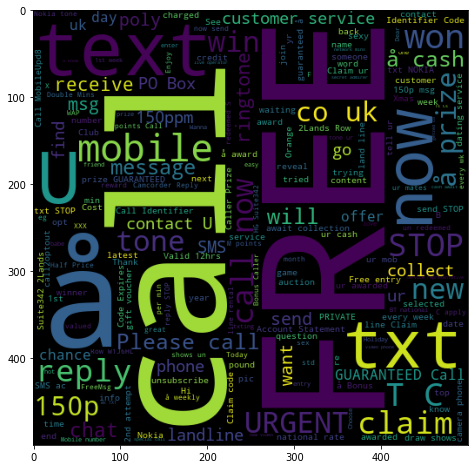

In [10]:
#visualizing spam words
spam_words= ' '.join(list(df[df['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

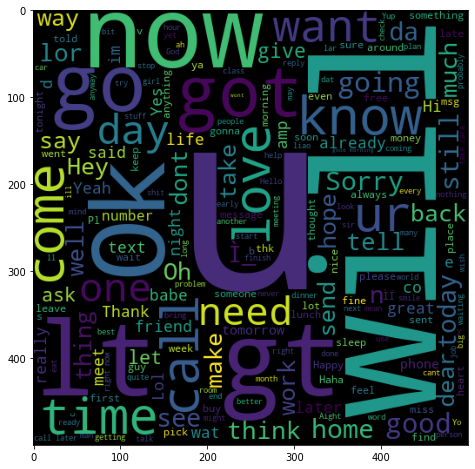

In [11]:
#visualizing ham words
spam_words= ' '.join(list(df[df['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

In [13]:
df.head()

labels                                           messages
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [14]:
df.shape

(5572, 2)

In [15]:
# Encoding our Labels
df['labels']=df['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [17]:
# preprocessing the Messages
df1=[]
import nltk
nltk.download('punkt')
for i in tqdm(range(df.shape[0])):
    lines=df.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    df1.append(final_lines)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/aarush100616/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 5572/5572 [03:47<00:00, 24.46it/s]


In [18]:
df1

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [22]:
Y=df['labels']

In [24]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

In [25]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(df1,Y,test_size=0.25)

In [26]:
X_train

['ju finish bath',
 'sun anti sleep medicine',
 'all read bat nd inning',
 'sm ac blind date u road aberdeen unit kingdom check http img sm ac w icb city r blind date send hide',
 'postal dot live lt gt century cm fred n think differ',
 'them hit link get premium pink panther game new sugabab crazy zebra anim bass hood wallpaper free',
 'roll beta invest anti age product',
 'talk atleast day otherwise miss best friend world shakespeare shell lt gt',
 'love smell bu tobacco',
 'already squat new way walk',
 'oh brand',
 'sorry de went shop',
 'yeah lead hour least sound',
 '',
 'babe got enough money pick bread milk give back get home',
 'xy go e lunch',
 'hot live fantasy call p per min ntt ltd po box crayon cr wb k',
 'tell quit long co finish film yet',
 'dear call tomorrow pl accord',
 'okay good problem than',
 'know anthony bring money school fee pay rent stuff like that need help friend need',
 'draw va dont think',
 'well genre price lt gt oz let know much want',
 'great get wor

In [27]:
X_test

['aaooooright work',
 'got louis sleep kept wake every hour see cat want come worry cold',
 'start send blackberry torch nigeria find buyer like month tell dad buy bb anyone oh',
 'yup red book slot weekend lia',
 'sunshine quiz wki q win top song dvd player u know country altar txt ans sp tron',
 'ya one slow poo',
 'sound like some someone test would say',
 'sunshine quiz wki q win top song dvd player u know country altar txt ans sp tron',
 'little dark far week need coffee run tomo believe time week already',
 'wen get spirit deep great',
 'perhaps much east give account identify tomorrow uni',
 'thank send mental bail question',
 'yup msg tat you tot group mate co meet today mah asking lead earlier wat mah co may has walk v far',
 'k k much cost',
 'sorry help',
 'awesome see bit',
 'pl send comprehend mail pay much',
 'hey around got enough half ten owe',
 'one talk',
 'today iz yellow rose day u love friendship give musical amp send ur find amp see mani miss call u get u get miss

In [28]:
Y_train

1069    0
2530    0
2028    0
304     1
2346    0
       ..
1924    0
3809    0
3230    0
3114    0
3835    0
Name: labels, Length: 4179, dtype: int64

In [29]:
Y_test

155     0
1943    0
1358    0
2684    0
1690    1
       ..
2095    0
3215    1
4191    0
1359    0
67      1
Name: labels, Length: 1393, dtype: int64

In [30]:
#Vectorizing using BOW
#tf_idf
from sklearn.feature_extraction.text import CountVectorizer  
matrix=CountVectorizer()

In [31]:
matrix

CountVectorizer()

In [32]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [33]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
Y_train

1069    0
2530    0
2028    0
304     1
2346    0
       ..
1924    0
3809    0
3230    0
3114    0
3835    0
Name: labels, Length: 4179, dtype: int64

In [36]:
Y_test

155     0
1943    0
1358    0
2684    0
1690    1
       ..
2095    0
3215    1
4191    0
1359    0
67      1
Name: labels, Length: 1393, dtype: int64

In [37]:
#Training model(Naive Bayes)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [38]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [45]:
model.class_count_

array([3633.,  546.])

In [40]:
Y_pred=model.predict(X_test_vect)

In [41]:
Y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
accuracy_score(Y_test,Y_pred) * 100

86.7910983488873

In [44]:
confusion_matrix(Y_test,Y_pred)

array([[1032,  160],
       [  24,  177]])